# Machine Learning with Regression

In situations where we want to predict continuous values, such as temperature,
housing prices, or salary, we can use regression models. This is another type
of supervised learning.

Themes covered are:
- Linear regression using `sklearn` and `statsmodels`
- Regularization with Linear Regression
- KNN
- Evaluating Regression Performance


## Linear Regression



In [1]:
import pandas as pd

housing_data_url = "https://raw.githubusercontent.com/PacktPublishing/Practical-Data-Science-with-Python/main/13-Chapter-13/data/housing_data_sample.csv"


housing_df = pd.read_csv(housing_data_url, index_col = "Id")

housing_df.head()

,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,SalePrice
Id,,,,,,,,
1,8450,2003,2,8,548,856,854,208500
2,9600,1976,2,6,460,1262,0,181500
3,11250,2001,2,6,608,920,866,223500
4,9550,1915,1,7,642,961,756,140000
5,14260,2000,2,9,836,1145,1053,250000


In [2]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   FullBath      1460 non-null   int64
 3   TotRmsAbvGrd  1460 non-null   int64
 4   GarageArea    1460 non-null   int64
 5   1stFlrSF      1460 non-null   int64
 6   2ndFlrSF      1460 non-null   int64
 7   SalePrice     1460 non-null   int64
dtypes: int64(8)
memory usage: 102.7 KB


SalePrice, which is the price at which a house is sold
between the years 2006 and 2010. The other columns are features that describe the
house, such as the area of the land the house is on (LotArea) and the number of
rooms above ground (TotRmsAbvGrd). The Garage and SF columns describe the square
footage of different parts of the house.

In [3]:
# Pearson's Correlation
housing_df.corr()

,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,SalePrice
LotArea,1.000000,0.014228,0.126031,0.190015,0.180403,0.299475,0.050986,0.263843
YearBuilt,0.014228,1.000000,0.468271,0.095589,0.478954,0.281986,0.010308,0.522897
FullBath,0.126031,0.468271,1.000000,0.554784,0.405656,0.380637,0.421378,0.560664
TotRmsAbvGrd,0.190015,0.095589,0.554784,1.000000,0.337822,0.409516,0.616423,0.533723
GarageArea,0.180403,0.478954,0.405656,0.337822,1.000000,0.489782,0.138347,0.623431
1stFlrSF,0.299475,0.281986,0.380637,0.409516,0.489782,1.000000,-0.202646,0.605852
2ndFlrSF,0.050986,0.010308,0.421378,0.616423,0.138347,-0.202646,1.000000,0.319334
SalePrice,0.263843,0.522897,0.560664,0.533723,0.623431,0.605852,0.319334,1.000000


We can see all the features seem to have at least a moderate-strength Pearson
correlation with the target variable, SalePrice. Remember that the Pearson
correlation is the default method used by the pandas corr function. It measures the
strength of linear correlations between variables, with a +1 being a perfect positive
correlation (both variables always increase together by proportional amounts), -1
being a perfect negative or inverse correlation, and 0 being no linear correlation at
all. Since we have several correlations that are well above 0, we can expect linear
regression to work for this problem. Let's first take a look at how to model the sale
price with linear regression.

## Linear Regression with sklearn

Before we fit a model to the data, let's break our data into train and test sets as we
did in the previous chapter. Remember that we want to evaluate the performance of
our models on an unseen test set to get an idea of how well the model will perform
on new data.

In [4]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(housing_df.drop("SalePrice", axis = 1), housing_df["SalePrice"], random_state = 42)

> For data with a time series aspect to it, it's much better to break up the data into
continuous chunks by time. For example, if we will use the model to predict future
home prices, we might want to use the earlier data as training and the latest data as
a test set. We can do this by sorting the DataFrame by its time column (YrSold in the
full dataset) then indexing the DataFrame to get something like 75% of the first part
of the data as train and the rest as test.

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

# Training R-Squarred Score
print(lr.score(x_train, y_train))

# Test R-Squarred Score
print(lr.score(x_test, y_test))

0.6922037863468924
0.7335111149578267


> This works just the same as we saw for classification models in sklearn. First, we
import the class for the model, then initialize it.

In [6]:
# Examining Model Coefficients

print(lr.coef_)

[ 4.69748692e-01  8.27939635e+02 -3.57322963e+03 -2.59678130e+01
  6.46264545e+01  9.74383176e+01  7.18384417e+01]


In [7]:
print(lr.intercept_)

-1619889.0110532893


> The way to interpret these coefficients is that the value is the increase in the
home price with a unit increase in the feature. For example, there is (on average)
an increase of 0.47 in the home price for each unit increase in lot area (the first
coefficient and feature). The coefficients are lined up with the column names in
x_train, so we can create a bar plot that's a little easier to interpret:

<AxesSubplot:>

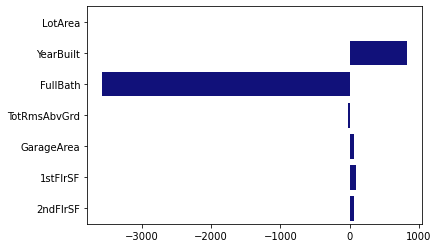

In [8]:
import seaborn as sns

sns.barplot(x = lr.coef_, y = x_train.columns, color="darkblue")

Something seems off with these coefficients. The Pearson correlation was positive for
all features with relation to the target variable, so we would expect the coefficients to
be positive. We can also create scatter plots of the features with the targets to observe
their relationships - for example, with:



<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

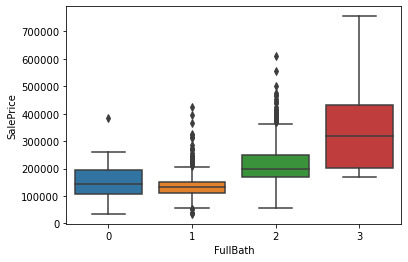

In [9]:
sns.boxplot(x = housing_df["FullBath"], y = housing_df["SalePrice"])

## Linear Regression with Stats Models


In [10]:
import statsmodels.api as sm

sm_lr = sm.OLS(y_train, sm.add_constant(x_train))

res = sm_lr.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     349.2
Date:                Tue, 26 Apr 2022   Prob (F-statistic):          6.20e-273
Time:                        20:40:59   Log-Likelihood:                -13242.
No. Observations:                1095   AIC:                         2.650e+04
Df Residuals:                    1087   BIC:                         2.654e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -1.62e+06   1.07e+05    -15.165      0.000   -1.83e+06   -1.41e+06
LotArea          0.4697      0.126      3.729      0.000       0.223       0.717
YearBuilt      827.9396     55.108     15.024      0.000     719.810     936.069
FullBath     -3573.2296   3523.070     -1.014      0.311   -1.05e+04    3339.558
TotRmsAbvGrd   -25.9678   1451.611     -0.018      0.986   -2874.245    2822.309
GarageArea      64.6265      8.145      7.934      0.000      48.645      80.608
1stFlrSF        97.4383      5.722     17.029      0.000      86.211     108.665
2ndFlrSF        71.8384      5.337     13.461      0.000      61.367      82.310
==============================================================================
Omnibus:                      425.967   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33633.259
Skew:                          -0.872   Prob(JB):                         0.00
Kurtosis:                      30.095   Cond. No.                     1.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

First, we import the statsmodels package as sm, then initialize our linear model with
the sm.OLS class (OLS stands for ordinary least squares, which is the method we are
using for our linear regressions here). Remember that with statsmodels we give the
data to the model class when we initialize it, giving it the target as the first argument
and features as the second argument. We need to add a constant to our features with
sm.add_constant if we want to get a y-intercept term. Then we train the model with
fit, and finally look at the results with the summary() method of the returned object
from the fit.

We can look at the two features with negative coefficients, FullBath and
TotRmsAbvGrd. They both have large p-values, signifying that their values are not
significantly different from 0. We can also see their standard errors are larger than
or about as large as the coefficients themselves and the 95% confidence interval for
these coefficients passes through 0. This means these coefficients are not useful and
we could drop these two columns from our dataset in this model. It appears the
other features are more important or better predictors of the home price. Note that
the FullBath and TotRmsAbvGrd features are still related to the target since they have
moderate Pearson correlations to SalePrice – if we fit a model using only one or both
of these, the coefficients will be positive and the p-values small.

In [11]:
sm_lr_2 = sm.OLS(y_train, sm.add_constant(x_train.drop(["FullBath", "TotRmsAbvGrd"], axis = 1)))

res_2 = sm_lr_2.fit()

res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     489.1
Date:                Tue, 26 Apr 2022   Prob (F-statistic):          2.15e-275
Time:                        20:40:59   Log-Likelihood:                -13243.
No. Observations:                1095   AIC:                         2.650e+04
Df Residuals:                    1089   BIC:                         2.653e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.574e+06   9.46e+04    -16.644      0.000   -1.76e+06   -1.39e+06
LotArea        0.4742      0.126      3.771      0.000       0.227       0.721
YearBuilt    803.3838     48.750     16.480      0.000     707.729     899.038
GarageArea    64.9009      8.133      7.980      0.000      48.944      80.858
1stFlrSF      95.4457      4.274     22.331      0.000      87.059     103.832
2ndFlrSF      69.5005      3.211     21.647      0.000      63.201      75.800
==============================================================================
Omnibus:                      405.899   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30895.723
Skew:                          -0.792   Prob(JB):                         0.00
Kurtosis:                      28.974   Cond. No.                     1.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By dropping these two features, we can perform some feature selection. We can also
use regularization to perform feature selection or at least prevent overfitting from
our model

### Regularized Regression

Regularization in linear regression works the same way with logistic regression. With logistic regression, we had a loss function we
optimized that captured the difference between predictions and actual values. With
linear regression, we use the same idea, and are minimizing the difference between
predictions and actual values. We minimize the sum of the squared differences
between predictions and actual values, which we can write in matrix notation as:
||Y − X𝛽𝛽||^2. With regularization, we can use `L1 (Lasso)` or `L2 (Ridge)` regression. We
can also combine the two with ElasticNet regularization. 
- L1 adds a linear penalty term to our minimization function (or loss function): ||Y − X𝛽||^2 + 𝛼|𝛽| . Alpha (𝛼) is a hyperparameter we can set. 

- With Ridge regression, we have a squared penalty term: ||Y − X𝛽𝛽||2 + ||Y − X𝛽||^2 + 𝛼|𝛽|^2. 

L1 tends to move coefficients to 0 while L2 does
not. We can also combine them with ElasticNet and set another hyperparameter that
controls the fraction of L1 vs L2. 

In [12]:
from sklearn.linear_model import LassoCV

# Cross Validated Implementation of Lasso
l1_lr = LassoCV()

l1_lr.fit(x_train, y_train)

# Alpha Value
l1_lr.alpha_

# l1_coeff
l1_lr.coef_

# Test R-Squarred Score
print(l1_lr.score(x_test, y_test))

0.7307830359520278


Here, we are using the cross-validation implementation of L1 regularization. This automatically searches 100 values for alpha for us using cross-validation. Recall
that we break up our training data into equal parts, then fit the model on part
of the data and test on the remainder. We do this n times and average the final
scores and can compare different settings for alpha this way.

In [13]:
from sklearn.linear_model import RidgeCV

# Cross Validated Implementation of Lasso
l2_lr = RidgeCV()

l2_lr.fit(x_train, y_train)

# Alpha Value
l2_lr.alpha_

# l1_coeff
l2_lr.coef_

# Test R-Squarred Score
print(l2_lr.score(x_test, y_test))

0.7335592791969395


In [14]:
from sklearn.linear_model import ElasticNetCV

# Cross Validated Implementation of Lasso
en_lr = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1])

en_lr.fit(x_train, y_train)

# Alpha Value
en_lr.alpha_

# l1_coeff
en_lr.coef_

# Test R-Squarred Score
print(en_lr.score(x_test, y_test))

0.7307830359520278


We can see our two coefficients that were negative are now 0, but the other
coefficients are quite different from our L1 regularization. To choose the best model
to use between the three, we can evaluate scores on the test dataset. First, we will not
use the L2 regularization because it contained large negative values for variables we
know should have positive coefficients. The R2 values from the Lasso and ElasticNet
models are around 0.73 and 0.4. It's clear that the Lasso model is much better, so we
can use that as our best linear regression model so far.

> By default, ElasticNet uses a value of 0.5 for the mix between L1 and L2 (this is the
l1_ratio parameter). We could also try optimizing that hyperparameter like so:
en_lr = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1]). This searches
the values in the list along with the 100 default alpha values for an optimum.

### Regression with KNN in SKLEARN

KNN takes the average target value of the nearest k points to make predictions,
either with uniform weights (the default with sklearn) or weighted by distance.
We can fit and evaluate the R2 score of a KNN model like so:

In [15]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(x_train, y_train)
print(knr.score(x_train, y_train))
print(knr.score(x_test, y_test))

0.7168991317708466
0.6053836803555437


> Again, all sklearn models work in the same fashion – initialize the model class with
any parameters (the default for the main hyperparameter, n_neighbors, is 5), then
fit it to data, then use the score function to evaluate the performance.

> We can see there is some overfitting since the test score is much lower than the train
score. Increasing the number of neighbors helps reduce this overfitting, although the
test score does not improve beyond 0.6. Since this is lower than our linear regression
model, we will stick with that one versus KNN.

### Evaluating Regression Models

Regression models have their own suite of metrics we can use to evaluate them.
We will cover some of the common metrics here:
- R^2
- Adjusted R^2
- Information Criteria (AIC, BIC)
- Mean Squarred Error
- Mean Absolute Error



In [16]:
from sklearn.metrics import r2_score

# Adjusted R^2

r2 = r2_score(y_test, l1_lr.predict(x_test))
n, p = x_test.shape
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(r2)
print(adj_r2)

0.7307830359520278
0.7255042719510871


Classically, R2 and adjusted R2 are used on the training set for linear regression and
not the test set. Also, we should ideally be using the mean of the training targets for
our SST equation. We can calculate this manually (for example, with numpy as in this
Stack Overflow answer: https://stackoverflow.com/a/895063/4549682), but using
the built-in sklearn function can serve as a quick-and-dirty solution for R2.
A better use of R2 and adjusted R2 is to compare the performance of linear models on
their training datasets. This can be one way to work toward selecting the best model.

### Linear Regression Assumptions

- Linear relationships between features and the target
- Normally distributed data
- No multicollinearity between features
- No autocorrelation of the target
- Homoscedasticity (uniformity of the spread of residual values across the data)

Text(0, 0.5, 'residuals')

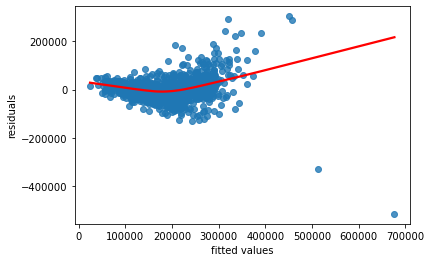

In [17]:
import matplotlib.pyplot as plt

predictions = l1_lr.predict(housing_df.drop('SalePrice', axis=1))
residuals = housing_df['SalePrice'] - predictions
sns.regplot(x=predictions,
            y=residuals,
            lowess=True,
            line_kws={'color': 'red'})


plt.xlabel('fitted values')
plt.ylabel('residuals')

First, we get our predictions and residuals, then plot it on a scatter plot with a
Lowess line (a locally-fitted linear model). We are using the full dataset here instead
of just the train or test set to get a more complete picture of the data.

We can see the Lowess line (or Lowess curve) is not very flat, indicating there are
some non-linear aspects to our data. This means our linearity assumption is not
perfectly captured, and it looks like there are some second-order effects. We could
try engineering some features, for example by squaring some of the features, which
may fix this issue. We also could simply try a more complex model, like a random
forest or another tree-based model. Another issue we see from this plot is the large
outliers at the high end of the data. These outliers skew the fit parameters and should
probably be excluded from the model.

### Regression Models on Big Data

Options to use when data is too large to fit on a single machine are:

- Vowpal Wabbit
- H20
- TensorFlow
- Spark
- Dask
- AWS Sage Maker or Google Cloud's Linear Learner

### Forecasting

Another use of regression is for forecasting. For example, we can forecast future
values in a time series like security prices, the weather, sales, or web traffic data.

In [18]:
import pandas as pd

btc_data_url = "https://raw.githubusercontent.com/PacktPublishing/Practical-Data-Science-with-Python/main/13-Chapter-13/data/bitcoin_price.csv"


btc_df = pd.read_csv(btc_data_url)

btc_df["time"] = pd.to_datetime(btc_df["time"], unit="ms")

btc_df.set_index("time", inplace=True)

# Select the Columns of Interest
btc_df = btc_df[["close", "volume"]]

In [19]:
# Create column with future closing price
btc_df["close_1d_future"] = btc_df["close"].shift(-1)


# Drop the Null Values
btc_df.dropna(inplace=True)


btc_df.head()

,close,volume,close_1d_future
time,,,
2013-03-31,93.033000,3083.079791,103.999000
2013-04-01,103.999000,5224.401313,118.229354
2013-04-02,118.229354,8376.527478,134.700000
2013-04-03,134.700000,12996.245072,132.899000
2013-04-04,132.899000,6981.668305,142.300000


> The shift function moves the data relative to the index. If we move the data back
by one timestep relative to the index, it is the closing price one day in the future. We
can provide any integer and get the price any day in the future this way. Because
this also creates missing values at the end of the dataset, we drop rows with missing
values to avoid problems later.

In [20]:
features = btc_df.drop("close_1d_future", axis = 1)

targets = btc_df["close_1d_future"]


train_idx = int(0.75 * btc_df.shape[0])

x_train = features.iloc[ : train_idx]

y_train = targets.iloc[ : train_idx]

x_test = features.iloc[train_idx : ]

y_test = targets.iloc[train_idx : ]

Here, we first create features by dropping the target column, and create the targets
by only selecting the target column. Then we get the index value for the 75th
percentile of data. We index the features and targets to keep the first 75% of the data
in the training set and then retain 25% of the data in the test set. Since this is a time
series dataset, we want to use the latest data as a test set and not randomly mix our
data to get the train and test sets.
We can then fit and evaluate a model. Here, we will use the MAE score to evaluate
it (to minimize the outliers' effects):

In [21]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error as mae

l1_lr = LassoCV(cv=TimeSeriesSplit())

l1_lr.fit(x_train, y_train)

print(mae(y_train, l1_lr.predict(x_train)))

print(mae(y_test, l1_lr.predict(x_test)))

85.63489721292613
220.80838114586564


We first fit a Lasso regression to the data, which also selects an optimal alpha value
from cross-validation. We also provide a time series cross-validator for the LassoCV
model, which doesn't break up data randomly into train/validation splits but uses the
first part of the data as train and the last part of the data as test, and slowly increases
the train size (a nice visualization of this can be found here: `https://scikit-learn.
org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-autoexamples-
model-selection-plot-cv-indices-py`). Unfortunately, it seems like we still
end up with an overfit model, which gives us MAE scores of 86 for train and 221 for
test (remember, lower is better for MAE). This is common for forecasting on financial
time series data, however. Part of the reason for this is that financial time series are
often correlated, which you can see by plotting the autocorrelation plot of our Bitcoin
close prices with the pd.plotting.autocorrelation_plot() function that we used
earlier. We can visualize the data like so:

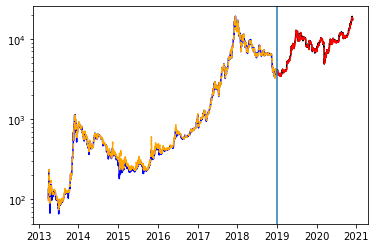

In [22]:
train_dates = btc_df.index[:train_idx]

test_dates = btc_df.index[train_idx:]

train_predictions = l1_lr.predict(x_train)

test_predictions = l1_lr.predict(x_test)

plt.plot_date(train_dates, y_train, fmt='-', color='b')

plt.plot_date(train_dates, train_predictions, fmt='--', color='orange')

plt.plot_date(test_dates, y_test, fmt='-', color='k')

plt.plot_date(test_dates, test_predictions, fmt='--', color='r')

plt.axvline(btc_df.index[train_idx])

plt.yscale('log')

In [23]:
# Using Prophet to DS
#We need our dates in a column named ds, and our target in a column named y:

btc_df.reset_index(inplace=True)

btc_df.drop("close_1d_future", axis = 1, inplace = True)

btc_df.rename(columns = {"close": "y", "time": "ds"}, inplace = True)

btc_df.head()

,ds,y,volume
0,2013-03-31,93.033000,3083.079791
1,2013-04-01,103.999000,5224.401313
2,2013-04-02,118.229354,8376.527478
3,2013-04-03,134.700000,12996.245072
4,2013-04-04,132.899000,6981.668305


In [24]:
from prophet import Prophet

m = Prophet()

m.fit(btc_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


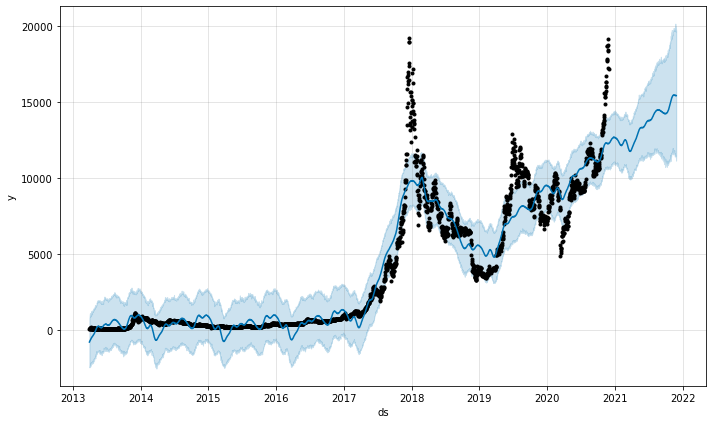

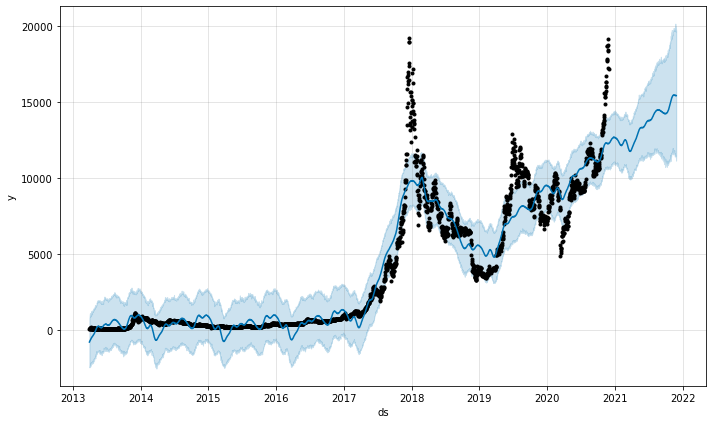

In [25]:
future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)

m.plot(forecast)

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


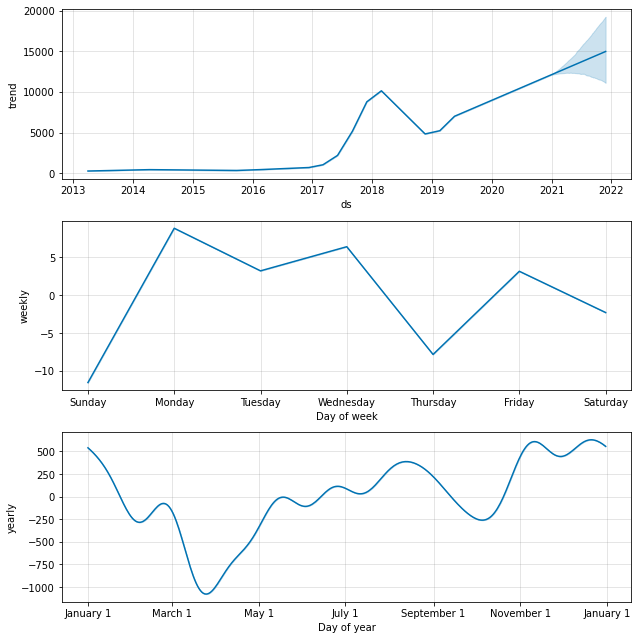

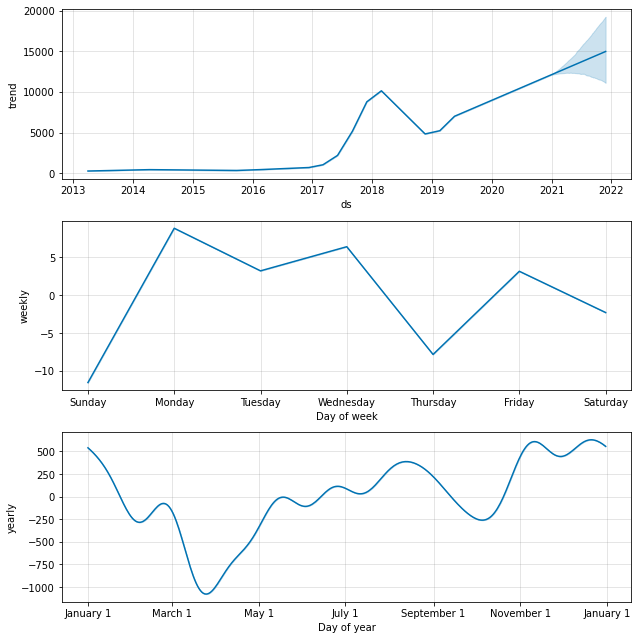

In [26]:
m.plot_components(forecast)